Filter data for weekdays and plot pedestrian counts

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


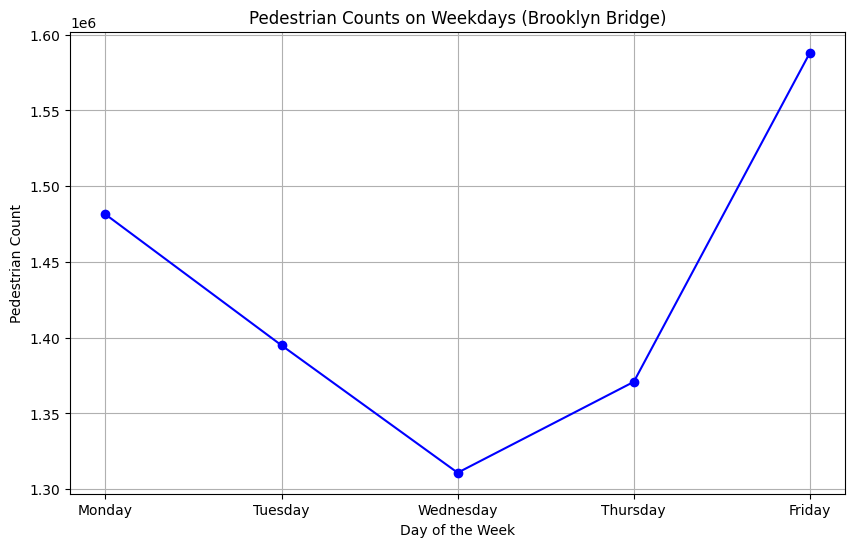

In [4]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

brooklyn_df = df[df['location'] == 'Brooklyn Bridge']

#filter weekdays
brooklyn_df['Day_of_Week'] = brooklyn_df['hour_beginning'].dt.day_name()
weekdays = brooklyn_df[brooklyn_df['Day_of_Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]


weekday_counts = weekdays.groupby('Day_of_Week')['Pedestrians'].sum()

#sorting days of week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_counts = weekday_counts.reindex(ordered_days)

#graph plot
plt.figure(figsize=(10, 6))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', color='b', linestyle='-')
plt.title('Pedestrian Counts on Weekdays (Brooklyn Bridge)')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.show()

 Analyze pedestrian counts on the Brooklyn Bridge in 2019 based on weather conditions:

                     clear-day  clear-night    cloudy       fog  \
clear-day             1.000000    -0.227660 -0.224004 -0.022002   
clear-night          -0.227660     1.000000 -0.265198 -0.026048   
cloudy               -0.224004    -0.265198  1.000000 -0.025630   
fog                  -0.022002    -0.026048 -0.025630  1.000000   
partly-cloudy-day    -0.220884    -0.261504 -0.257304 -0.025273   
partly-cloudy-night  -0.175456    -0.207722 -0.204386 -0.020075   
rain                 -0.119645    -0.141648 -0.139373 -0.013690   
sleet                -0.013257    -0.015695 -0.015443 -0.001517   
snow                 -0.028943    -0.034266 -0.033715 -0.003312   
wind                 -0.009372    -0.011096 -0.010917 -0.001072   
Pedestrian_Counts     0.339758    -0.377297 -0.081255 -0.026457   

                     partly-cloudy-day  partly-cloudy-night      rain  \
clear-day                    -0.220884            -0.175456 -0.119645   
clear-night                  -0.261504           

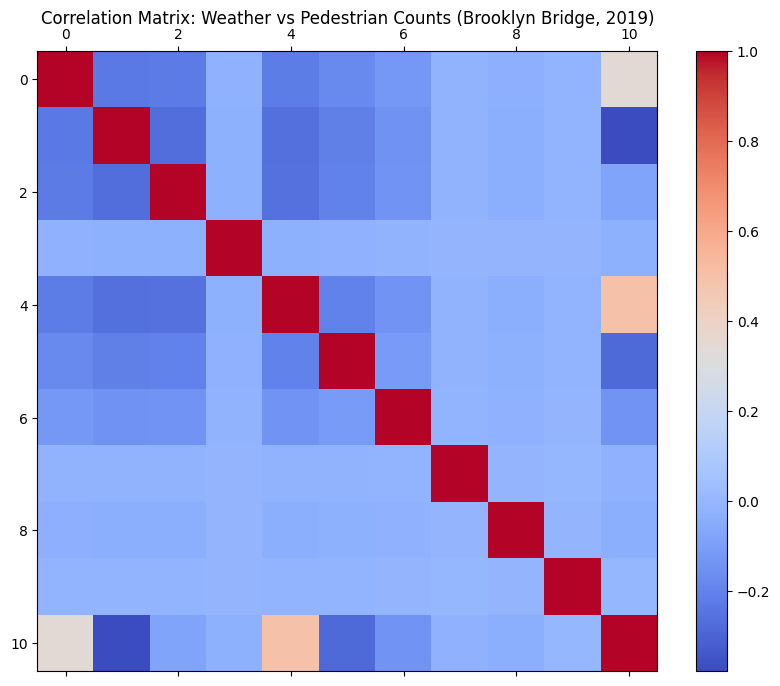

In [6]:
#2019 brook
brooklyn_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

#one hot encode
brooklyn_2019_encoded = pd.get_dummies(brooklyn_2019['weather_summary'])

#pedastrian count
brooklyn_2019_encoded['Pedestrian_Counts'] = brooklyn_2019['Pedestrians']

#corr matrix
correlation_matrix = brooklyn_2019_encoded.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix: Weather vs Pedestrian Counts (Brooklyn Bridge, 2019)', pad=20)
plt.show()


Categorize time of day and analyze pedestrian activity patterns

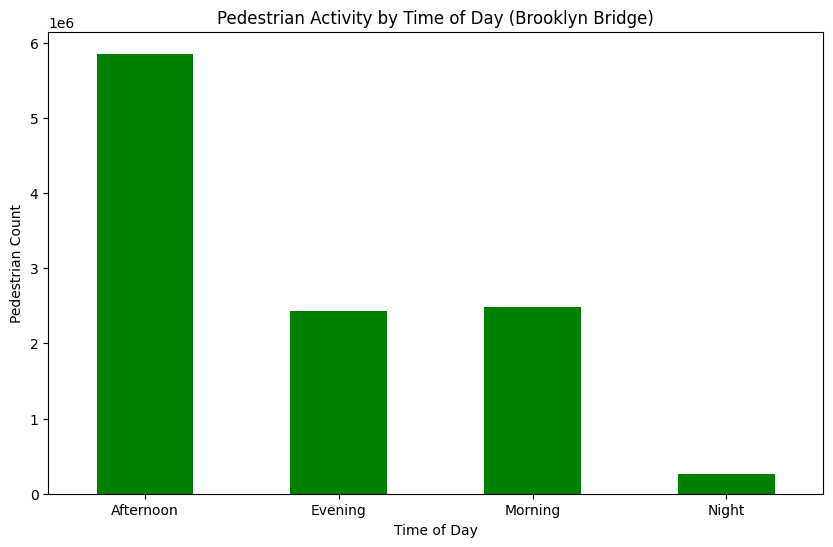

In [8]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Hour'] = pd.to_datetime(df['hour_beginning']).dt.hour
df['Time_of_Day'] = df['Hour'].apply(categorize_time_of_day)

#pedestrian activity based on time of day
brooklyn_df = df[df['location'] == 'Brooklyn Bridge']
time_of_day_activity = brooklyn_df.groupby('Time_of_Day')['Pedestrians'].sum()



plt.figure(figsize=(10, 6))
time_of_day_activity.plot(kind='bar', color='green')
plt.title('Pedestrian Activity by Time of Day (Brooklyn Bridge)')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.xticks(rotation=0)
plt.show()
